# Generate heatmaps
The goal of this notebook is to take the processed feature counts and experimental design tables and generate heatmaps for a given gene list. This notebook runs code in R using the DESeq2 differential expression package and the pheatmap visualization package.

## Instructions
Before running this notebook, format the feature count data with the featureCountprocessing-generic notebook. The notebooks are separated because the processing notebook runs Python code, not R. Once the processed featureCounts and experimental design table have been created:

- Run the first cell to import the necessary libraries and define the functions used to process the data.
- 

In [38]:
#import libraries
library("DESeq2")
library("pheatmap")

#define functions for DESeq2 object creation and heatmap creation

#input and process sample data (experiment design)
input_sample_data <- function(filepath, print_debug=FALSE){
    sampleData <- read.delim(filepath)
    sampleData_v2 <- sampleData
    
    rownames(sampleData) <- sampleData$SampleID.Lab
    sampleData$Cell.Line <- factor(sampleData$Cell.Line)
    sampleData$Time.Point <- factor(sampleData$Time.Point)
    if(print_debug == TRUE){
        print(head(sampleData))
        }
    return(sampleData)
}

#Input and process raw gene counts (Feature Counts)
input_raw_counts <- function(filepath, sampleData, print_debug=FALSE){
    rawCounts <- read.delim(filepath)
    #print(head(rawCounts))
    
    geneID <- rawCounts$gene_name
    sampleIndex <- grepl("ES\\d+", colnames(rawCounts))
    rawCounts <- as.matrix(rawCounts[,sampleIndex])
    rownames(rawCounts) <- geneID
    if(print_debug == TRUE){
        print(head(rawCounts))
        }
    
    rawCounts <- rawCounts[,unique(rownames(sampleData))]
    cat("Test that dimensions of rawCounts and sampleData match:", all(colnames(rawCounts) == rownames(sampleData)), "\n")
    return(rawCounts)
}


#make heatmap: make DeSeq dataset and generate heatmap
#gene_number: enter number of genes to display (sorted by biggest difference)
#cluster_cols_bool: indicate whether columns should be clustered
make_heatmap <- function(rawCounts, sampleData, gene_number=50, cluster_cols_bool=TRUE){
    dds <- DESeqDataSetFromMatrix(countData=rawCounts, colData=sampleData, design= ~ CRISPR + Time.Point)
    select <- order(rowMeans(counts(dds,normalized=FALSE)),decreasing=TRUE)[1:gene_number]
    df <- as.data.frame(colData(dds)[,c("Time.Point","Inhibition.Status")])
    ntd <- normTransform(dds)
    pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=TRUE,
             cluster_cols=cluster_cols_bool, annotation_col=df, color = colorRampPalette(c("red", "white", "blue"))(100))
}

data_to_heatmap <- function(filepath_exp_design, filepath_featureCounts){
    sampleData <- input_sample_data(filepath_exp_design)
    rawCounts <- input_raw_counts(filepath_featureCounts, sampleData)
    cat("Top: Heatmap without column clustering\nBottom: Heatmap with column clustering\n")
    make_heatmap(rawCounts, sampleData, gene_number=22, cluster_cols_bool=FALSE)
    make_heatmap(rawCounts, sampleData, gene_number=22, cluster_cols_bool=TRUE)
}

Test that dimensions of rawCounts and sampleData match: TRUE

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“2 duplicate rownames were renamed by adding numbers”


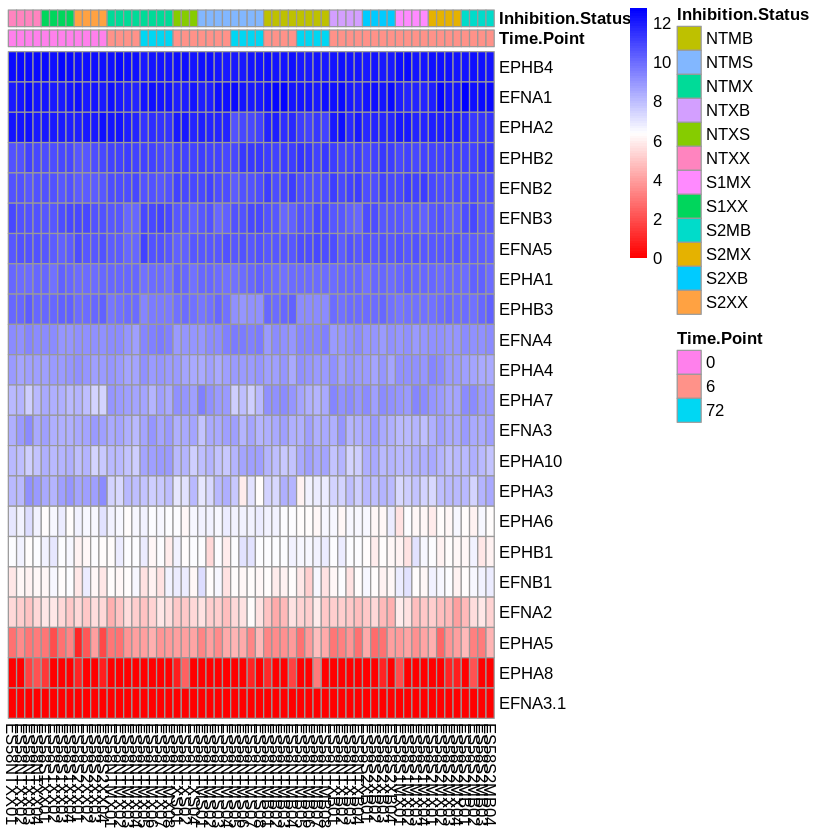

In [27]:
#Ephrins H358
sampleData_H358 <- input_sample_data("20201009-H358-experiment-design.tsv")
rawCounts_H358_ephrin <- input_raw_counts("20210209-featureCounts-H358-ephrin.tsv", sampleData_H358)
make_heatmap(rawCounts_H358_ephrin, sampleData_H358, gene_number=22, cluster_cols_bool=FALSE)

Test that dimensions of rawCounts and sampleData match: TRUE 
Top: Heatmap without column clustering
 Bottom: Heatmap with column clustering


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“2 duplicate rownames were renamed by adding numbers”
Warning message in DESeqDataSet(se, design = design, ignoreRank):
“2 duplicate rownames were renamed by adding numbers”


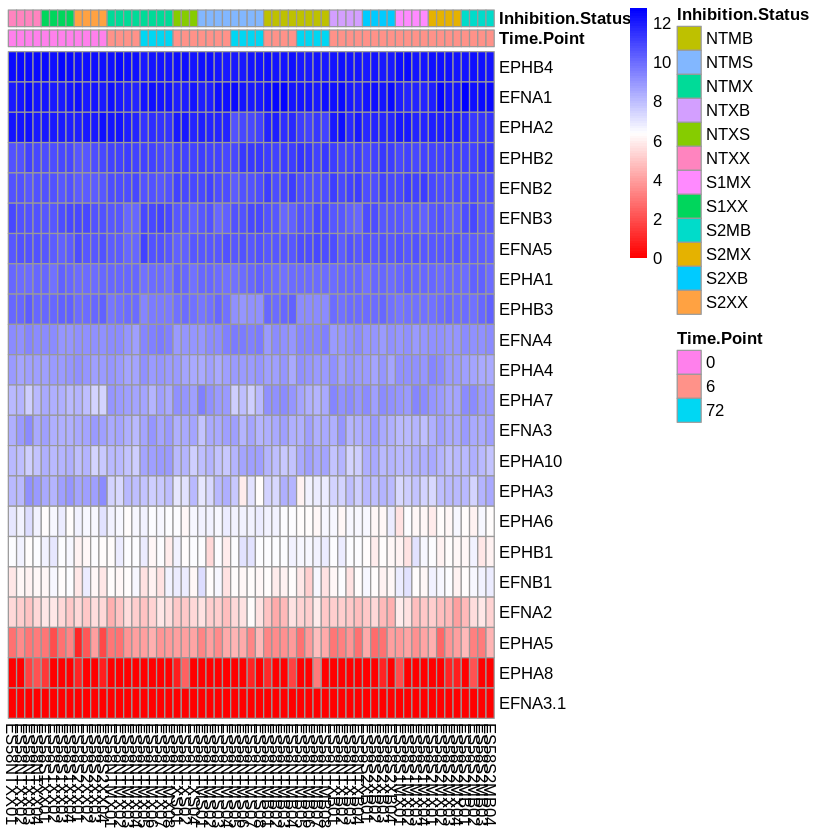

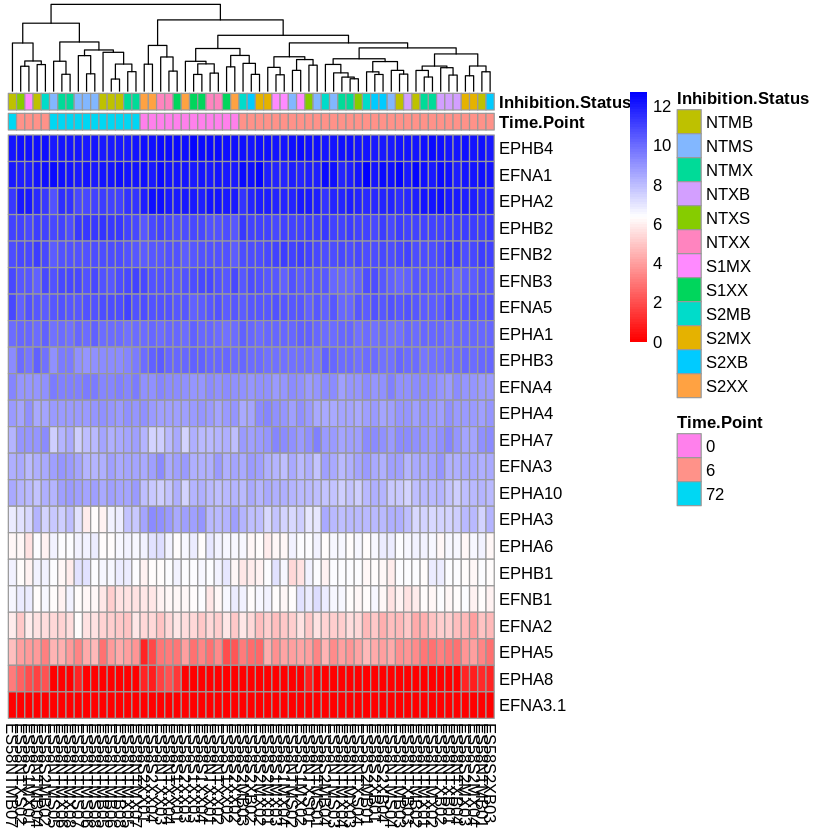

In [37]:
data_to_heatmap("20201009-H358-experiment-design.tsv", "20210209-featureCounts-H358-ephrin.tsv")

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“2 duplicate rownames were renamed by adding numbers”


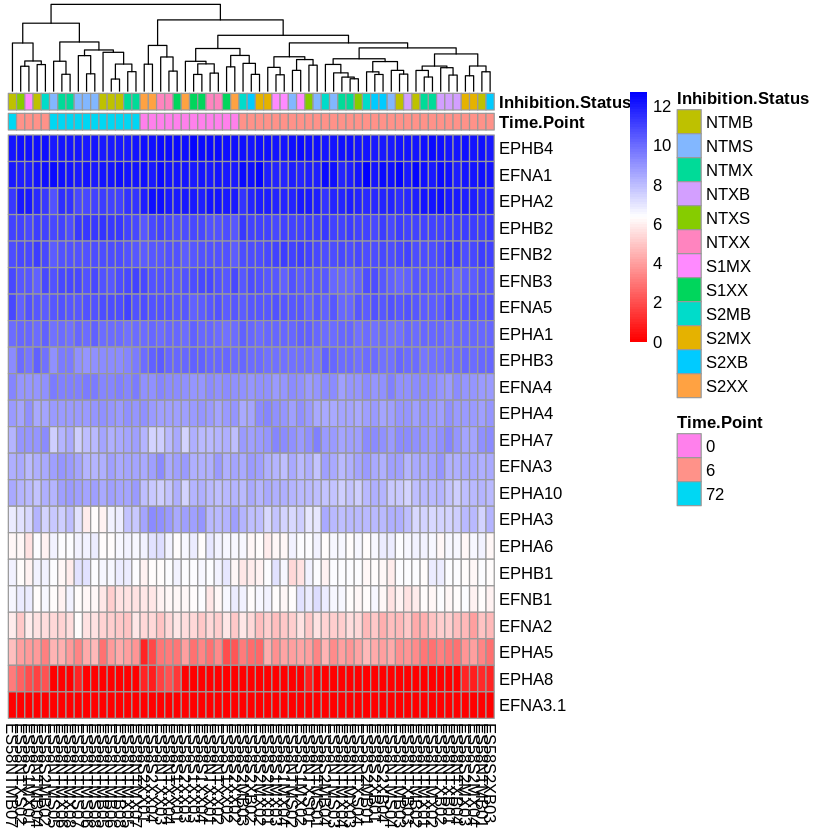

In [28]:
#Ephrins H358 with columns sorted
make_heatmap(rawCounts_H358_ephrin, sampleData_H358, gene_number=22, cluster_cols_bool=TRUE)

Test that dimensions of rawCounts and sampleData match: TRUE

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“2 duplicate rownames were renamed by adding numbers”


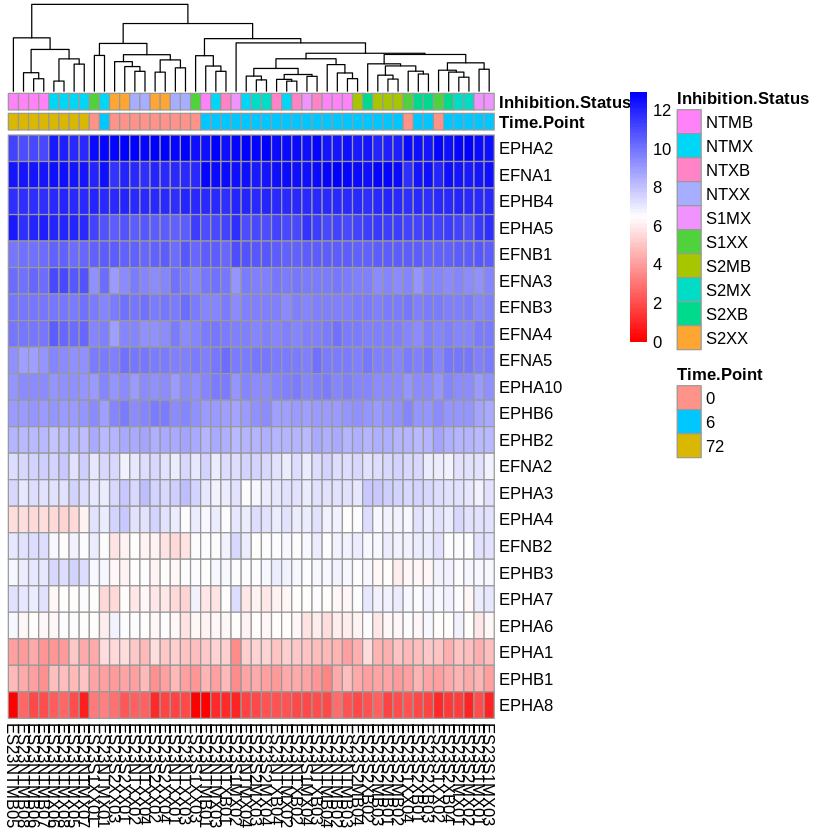

In [29]:
#Ephrin H23, columns sorted
sampleData_H23 <- input_sample_data("20201027-H23-experiment-design.tsv")
rawCounts_H23_ephrin <- input_raw_counts("20210113-featureCounts-H23-ephrin.tsv", sampleData_H23)
make_heatmap(rawCounts_H23_ephrin, sampleData_H23, gene_number=22, cluster_cols_bool=TRUE)

Test that dimensions of rawCounts and sampleData match: TRUE

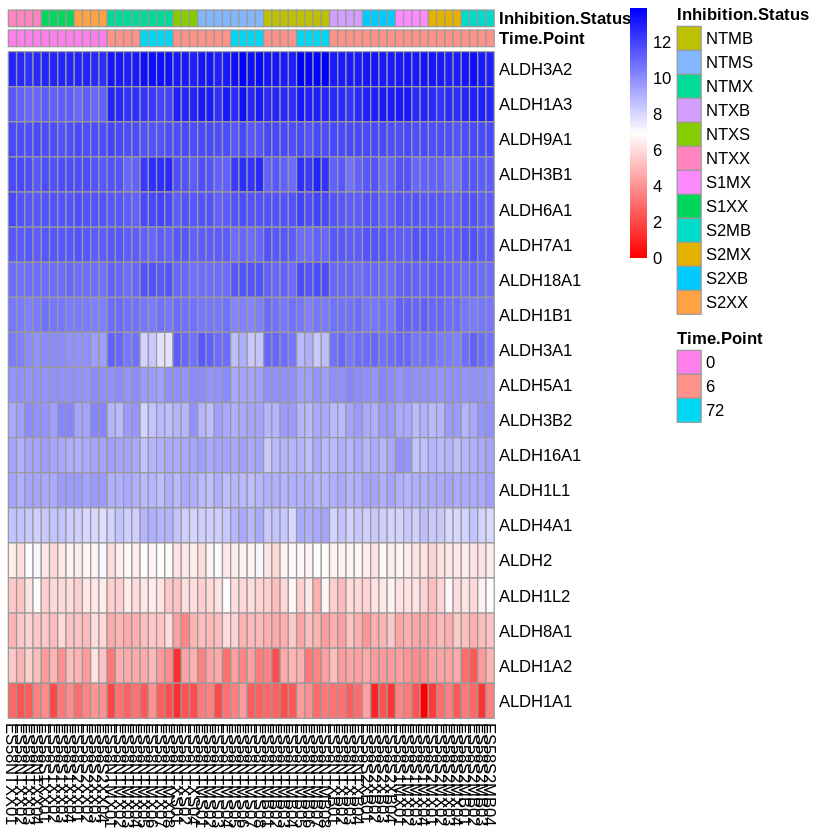

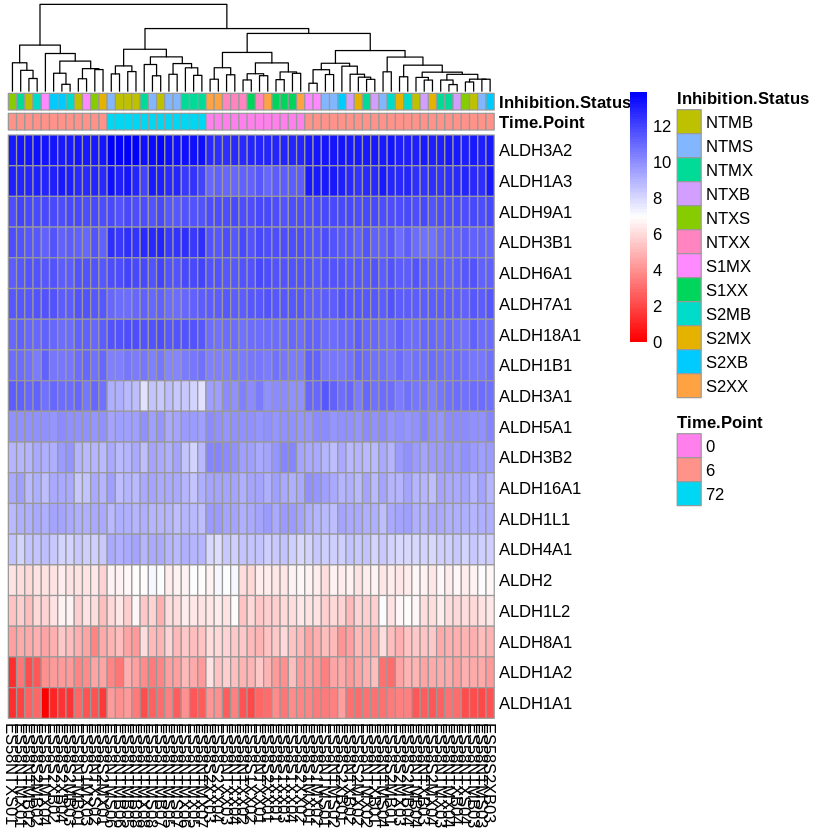

In [30]:
#ALDH H358
sampleData_H358 <- input_sample_data("20210209_experiment_design_H358.tsv")
rawCounts_H358_ephrin <- input_raw_counts("20210209_featureCounts_H358-ALDH.tsv", sampleData_H358)
make_heatmap(rawCounts_H358_ephrin, sampleData_H358, gene_number=19, cluster_cols_bool=FALSE)
make_heatmap(rawCounts_H358_ephrin, sampleData_H358, gene_number=19, cluster_cols_bool=TRUE)

Test that dimensions of rawCounts and sampleData match: TRUE

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“7 duplicate rownames were renamed by adding numbers”


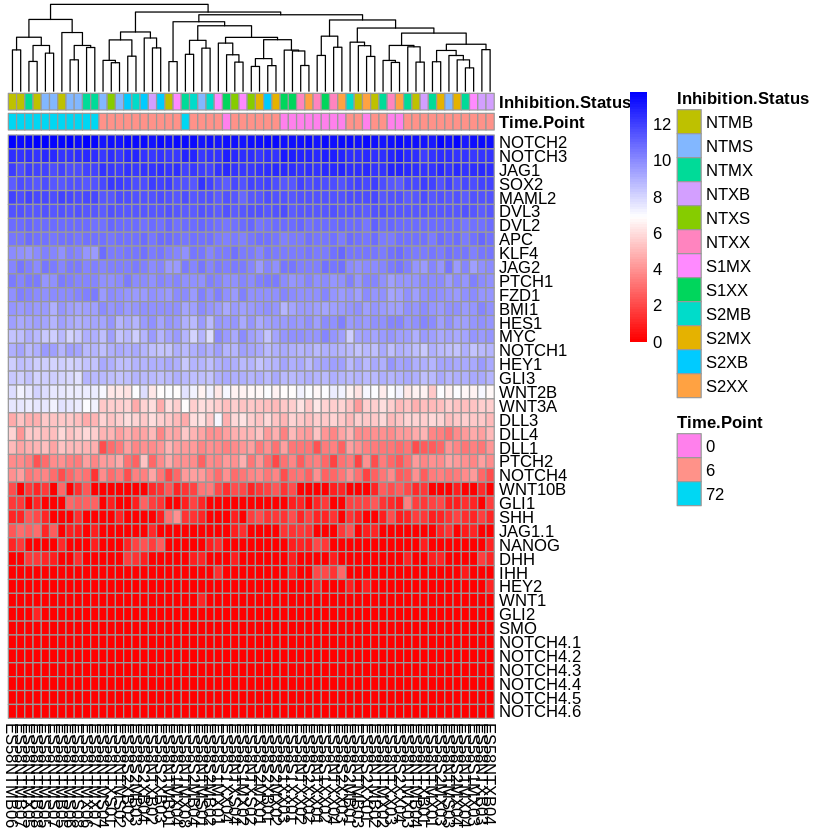

In [31]:
#Stem cell associated H358
sampleData_H358 <- input_sample_data("20210209_experiment_design_H358.tsv")
rawCounts_H358_ephrin <- input_raw_counts("20210209_featureCounts_H358-Stem_cell_assoc.tsv", sampleData_H358)
make_heatmap(rawCounts_H358_ephrin, sampleData_H358, gene_number=42, cluster_cols_bool=TRUE)